In [471]:
#import 
from UZ_utils import *
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
from a6_utils import *

# Exercize 1

[[1. 0.]
 [6. 2.]
 [5. 4.]
 [1. 3.]
 [0. 1.]]
[[1. 6. 5. 1. 0.]
 [0. 2. 4. 3. 1.]]
[[-1.6  3.4  2.4 -1.6 -2.6]
 [-2.   0.   2.   1.  -1. ]]
5
[[-0.92992935 -0.36773822]
 [-0.36773822  0.92992935]]
[8.18975683 1.61024317]
[[-0.92992935 -0.36773822]
 [-0.36773822  0.92992935]]
[-0.92992935 -0.36773822]
[-0.36773822  0.92992935]
[8.18975683 1.61024317]


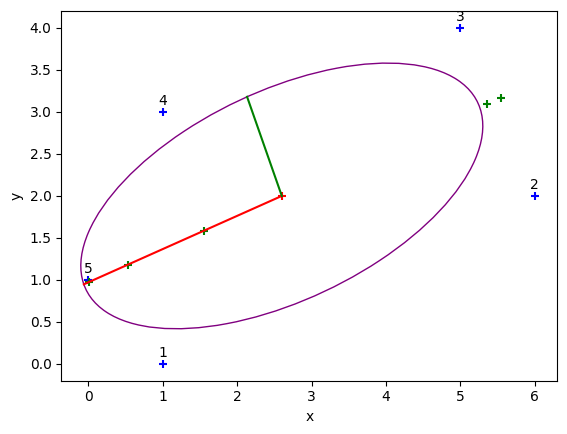

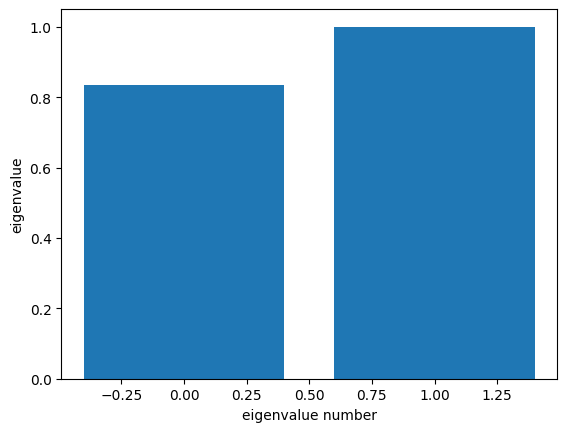

0.8356894724407343


In [472]:
#Write a script to calculate and visualize PCA from 2D data from the file points.txt
#Load the data it is a line by line list of points in the form of x y
points = np.loadtxt('data/points.txt', delimiter=' ', dtype=np.float64)
print(points)
#plot the points as a scatter plot with labels and in the form of +
plt.scatter(points[:,0], points[:,1], color='blue', marker='+')
#add point num above each point
for i in range(len(points)):
    plt.annotate(i+1, (points[i,0], points[i,1]), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('x')
plt.ylabel('y')


#Calculate the mean of the data
mean = np.mean(points, axis=0)
#add the mean to the plot
plt.scatter(mean[0], mean[1], color='red', marker='+')



#create a matrix of the data
x=points[:,0]
y=points[:,1]

#stack the data
data=np.stack((x,y), axis=0)
print(data)
#reshape the mean
mean=mean.reshape(2,1)

#Calculate the covariance matrix of the data
Xd = data - mean
print(Xd)
print(len(Xd[0]) )

C= (1/(len(Xd[0])-1) )* np.dot(Xd, Xd.T)

drawEllipse(mean, C, n_std=1)


#Compute SVD of the covariance matrix:
U, S, V = np.linalg.svd(C)
print(U)
print(S)
print(V)


#get colums of U
u1=U[:,0]
u2=U[:,1]
print(u1)
print(u2)

#get the eigenvalues
eigenvalues=S
print(eigenvalues)

vec1=u1 * np.sqrt(eigenvalues[0])
vec2=u2 * np.sqrt(eigenvalues[1])

#plot the vectors as lines starting at the mean and going in the direction of the eigenvectors
plt.plot([mean[0], mean[0]+vec1[0]], [mean[1], mean[1]+vec1[1]], color='red')
plt.plot([mean[0], mean[0]+vec2[0]], [mean[1], mean[1]+vec2[1]], color='green')










#project into pca space

ys = U.T @ (data - mean)


U_diminished = np.copy(U)
U_diminished[:,1] = 0

xq = np.dot(U_diminished, ys) + mean

plt.scatter(xq[0], xq[1], color='green', marker='+')










plt.show()


#cumulitive sum of the eigenvalues
eigenvalues_sum=np.cumsum(eigenvalues)
#plot the eigenvalues
plt.bar(range(len(eigenvalues_sum)), eigenvalues_sum/eigenvalues_sum[-1])

plt.xlabel('eigenvalue number')
plt.ylabel('eigenvalue')
plt.show()


#what percent of the variance is explained just by using the first eigenvector?
print(eigenvalues[0]/sum(eigenvalues))



# Plot the points and draw the representation of the Gaussian distribution using drawEllipse 


[5. 4.]
the closest point to h transformed into the original space is
[5.54021325 3.16269992]


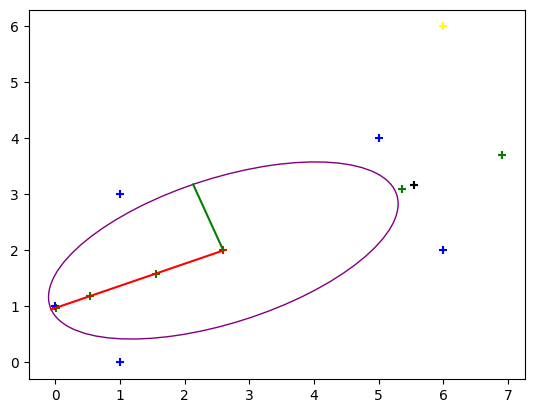

In [473]:

point_h = np.array([6, 6])

#calcule the closes poit with euclidean distance
distances = np.linalg.norm(points - point_h, axis=1)
closest_point = points[np.argmin(distances)]
print(closest_point)


#project onto the pca space including the point h
data2 = data.copy() 
data2 = np.hstack((data2, point_h.reshape(2,1)))
#print(data2)
ys = U.T @ (data2 - mean)
#print(ys)

xs = np.dot(U_diminished, ys) + mean
#print(xs)

plt.scatter(xs[0], xs[1], color='green', marker='+')

#plot data  
plt.scatter(points[:,0], points[:,1], color='blue', marker='+')
plt.scatter(mean[0], mean[1], color='red', marker='+')
plt.scatter(point_h[0], point_h[1], color='yellow', marker='+')

#plot the vectors as lines starting at the mean and going in the direction of the eigenvectors
plt.plot([mean[0], mean[0]+vec1[0]], [mean[1], mean[1]+vec1[1]], color='red')
plt.plot([mean[0], mean[0]+vec2[0]], [mean[1], mean[1]+vec2[1]], color='green')

#elipse
drawEllipse(mean, C, n_std=1)

#which point is closest to h now?
distances = np.linalg.norm(xs - xs[:,-1].reshape(2,1), axis=0)
#remove zero distance

#print(distances)
distances = distances[:-1]
closest_point = xs[:,np.argmin(distances)]
print("the closest point to h transformed into the original space is")
print(closest_point)

#plot the closest point
plt.scatter(closest_point[0], closest_point[1], color='black', marker='+')


# Exercize 2 Dual PCA

In [474]:
def pca2d(data):
    """
    Performs PCA on 2D data
    :param data: 2D array of data points
    :return: mean, U, S, V
    """

    m, N = data.shape
    #print(m, N)

    mean = np.mean(data, axis=1, keepdims=True)
    #print(mean)

    Xd = data - mean
    #print(Xd)

    C2 = 1/(N-1) * (Xd.T @ Xd)
    #print(C2)

    # Compute SVD of the covariance matrix:
    U, S, V = np.linalg.svd(C2)
    #add a small value to the diagonal of the S matrix 10-15
    #print(S.shape)
    #print(S)
    S = S + 10**-15
    
    #print(U)

    #compute the basis of the eigenvector space

    U2 = Xd @ U @ np.diag(1 / np.sqrt(S * (N - 1)))

    return  U2, S, V , mean , C2










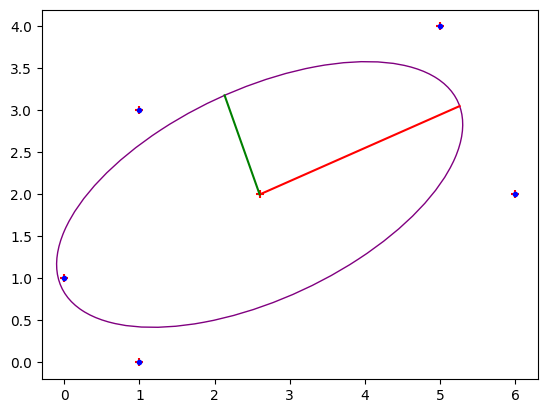

In [475]:
U2, S, V2 , meann , C2 = pca2d(data)

yss = U2.T @ (data - meann)

xs = np.dot(U2, yss) + mean

plt.scatter(xs[0], xs[1], color='red', marker='+')

#plot data
plt.scatter(points[:,0], points[:,1], color='blue', marker='.')
plt.scatter(mean[0], mean[1], color='red', marker='+')

#plot the vectors as lines starting at the mean and going in the direction of the eigenvectors
vec1=U2[:,0] * np.sqrt(S[0])
vec2=U2[:,1] * np.sqrt(S[1])
plt.plot([meann[0], meann[0]+vec1[0]], [meann[1], meann[1]+vec1[1]], color='red')
plt.plot([meann[0], meann[0]+vec2[0]], [meann[1], meann[1]+vec2[1]], color='green')


#elipse
drawEllipse(meann, C, n_std=1)



# Exercize 3 Image decomposition examples

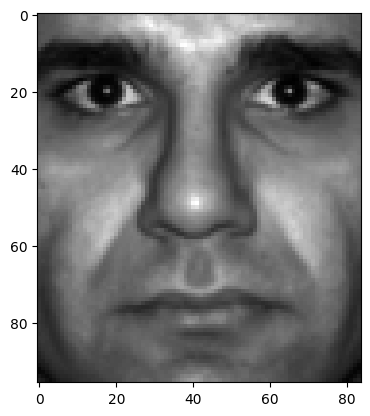

In [476]:
import os

def get_faces(i):
    #get the images from the dataset in data/i/*.png
    faces = []
    #gen filenames from 000 0064
    for j in range(1,65):
        filename = str(j).zfill(3)
        #print(filename)
        name=os.path.join('data',"faces", str(i), filename + '.png')
       #read img as grayscale and flatten and float
        img = imread_gray(name).flatten()
        
        #print(img.shape)
        #imshow(img)
        faces.append(img)



    return np.array(faces)
    
  

h=get_faces(1)

#show the first image 84 × 96 reverse flatten
plt.imshow(h[0].reshape(96,84), cmap='gray')
plt.show()





In [477]:
U3, S3, V3 , meann3 , C3 = pca2d(get_faces(1).T)


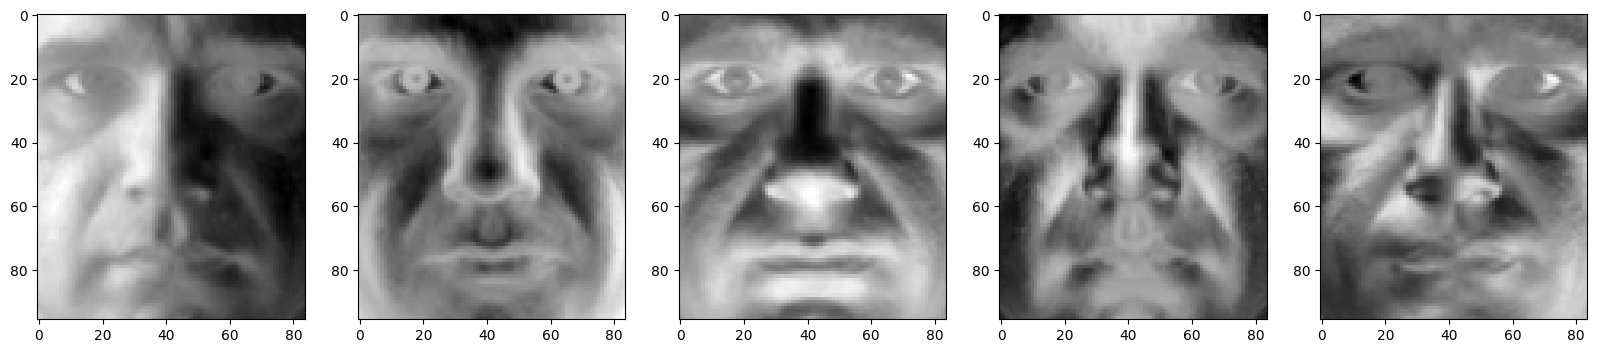

In [478]:
plt.figure(figsize=(20,5))
for i in range(5):
	plt.subplot(1,5,i+1)
	plt.imshow(U3[:,i].reshape((96, 84)), cmap="gray")

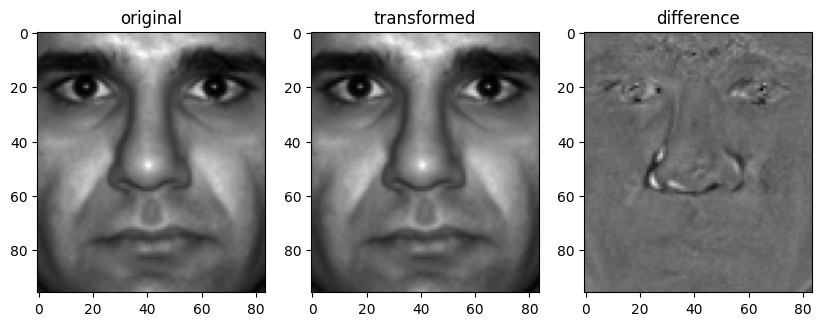

In [479]:
face1 = get_faces(1)[0]

ys= U3.T @ (face1.reshape((-1, 1)) - meann3)

xs = np.dot(U3, ys) + meann3

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("original")
plt.imshow(face1.reshape((96,84)), cmap="gray")
plt.subplot(1,3,2)
plt.title("transformed")
plt.imshow(xs.reshape((96,84)), cmap="gray")
plt.subplot(1,3,3)
plt.title("difference")
plt.imshow(xs.reshape((96,84)) - face1.reshape((96,84)))


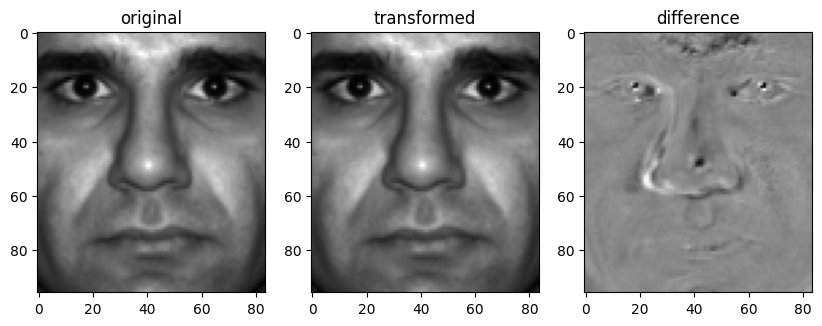

In [480]:
face_with_one_set_to_zero = np.copy(face1)
face_with_one_set_to_zero[4074] = 0

ys= U3.T @ (face_with_one_set_to_zero.reshape((-1, 1)) - meann3)


xs = np.dot(U3, ys) + meann3

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("original")
plt.imshow(face1.reshape((96,84)), cmap="gray")
plt.subplot(1,3,2)
plt.title("transformed")
plt.imshow(xs.reshape((96,84)), cmap="gray")
plt.subplot(1,3,3)
plt.title("difference")
plt.imshow(xs.reshape((96,84)) - face1.reshape((96,84)))

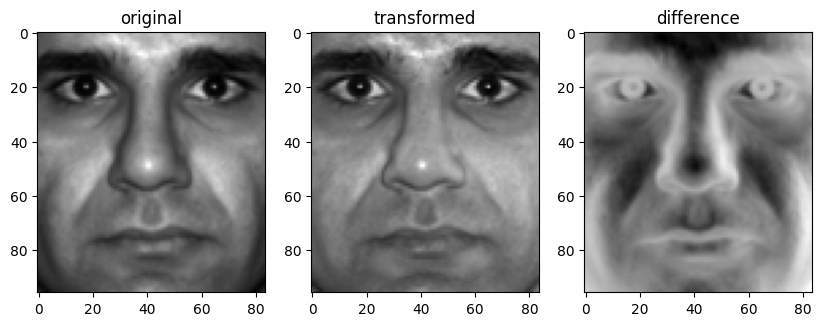

In [481]:
face1 = get_faces(1)[0]

ys= U3.T @ (face1.reshape((-1, 1)) - meann3)

#remove the 1st eigenvector
ys[1] = 0


xs = np.dot(U3, ys) + meann3

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title("original")
plt.imshow(face1.reshape((96,84)), cmap="gray")
plt.subplot(1,3,2)
plt.title("transformed")
plt.imshow(xs.reshape((96,84)), cmap="gray")
plt.subplot(1,3,3)
plt.title("difference")
plt.imshow(xs.reshape((96,84)) - face1.reshape((96,84)))

32
16
8
4
2
1


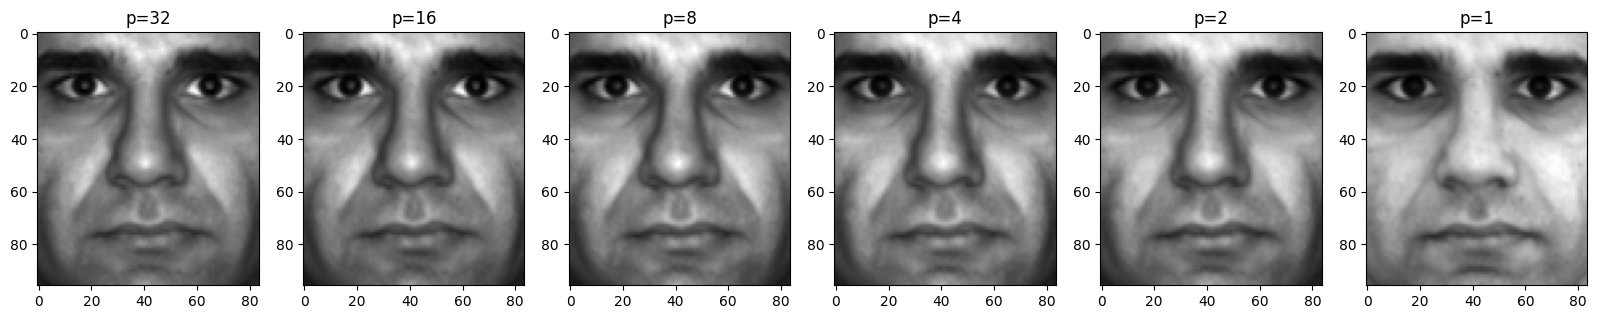

In [482]:
face1 = get_faces(1)[0]

ys= U3.T @ (face1.reshape((-1, 1)) - meann3)

imhs=[]

for i in range(5,-1,-1):
    p=2**i
    print(p)
    ys[p:] = 0
    xs = np.dot(U3, ys) + meann3
    imhs.append(xs.reshape((96,84)))

plt.figure(figsize=(20,5))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.title("p="+str((2**(5-i))))
    plt.imshow(imhs[i], cmap="gray")

    
    
